![](1.png)

![](2.png)

In [3]:
## Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [32]:
## fetching and loading the dataset

url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
data = pd.read_csv(url)


In [33]:
## checking the header of the dataset
data.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [34]:
data.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

## From the above  problem statement we are asked to build a model which can predict whether a person makes over 50K or not, since the the outcome have two classes (Income <=50K) or Income(>50K) we can say that is a classification problem.

In [35]:
data.shape

(32560, 15)

#### From the data.shape we can see that our dataset has 32560 records(rows) and 15 attributes(columns)

In [36]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### From the info() method we can see some details about our dataset, like the "data type" (dtypes), the columns indexes and the "Non-Null Count". we can see that some all the columns of our dataset have the same non-null count equal 32560, this mean there no missing values in the dataset.

In [37]:
## This will help to see how is shape the data in each column and it  will help to drop some columns if there not important.

for column in data.columns:
    print(data[column].value_counts())
    print('**'*20)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

### Found out that the column __"Education"__ since we have one more column called Education_Num which is similar to it. wwill also drop the __"Native_country"__ because I think is not important to predict the label.

In [38]:
## let's above two column
data.drop(['Education','Native_country'],axis=1,inplace=True)


In [39]:
### let's chech for the duplicated records

data.duplicated().sum()

25

#### From the above verication we can see that there are 25 duplicated values 

In [52]:
### Dropping duplicated values  and create new dataset without duplicate values

new_data = data.drop_duplicates()

In [53]:
## let's verify the new dataset

new_data.duplicated().sum()

0

In [54]:
new_data.shape

(32535, 13)

#### We can see that our new dataset have 32535 records and 13 columns.

#### We can see that the duplicated records are removed in our new_data too , great.

## Now let's Encoder the text data into number.

In [55]:
new_data.head(2)

Age          Workclass  Fnlwgt  Education_num       Marital_status  \
0   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
1   38            Private  215646              9             Divorced   

           Occupation    Relationship    Race    Sex  Capital_gain  \
0     Exec-managerial         Husband   White   Male             0   
1   Handlers-cleaners   Not-in-family   White   Male             0   

   Capital_loss  Hours_per_week  Income  
0             0              13   <=50K  
1             0              40   <=50K

## Let's used __Label Encoder__ to convert the text data into numerical data for some columns those are not __musearable or unscable.__

In [57]:
## importing the libraries
from sklearn.preprocessing import LabelEncoder

### first let's seperate the dataset into 2 numerical and non-numerical.

In [58]:
non_num_data = new_data.drop(new_data.describe().columns,axis=1)

In [59]:
## verification 
non_num_data.head(2)

Workclass       Marital_status          Occupation    Relationship  \
0   Self-emp-not-inc   Married-civ-spouse     Exec-managerial         Husband   
1            Private             Divorced   Handlers-cleaners   Not-in-family   

     Race    Sex  Income  
0   White   Male   <=50K  
1   White   Male   <=50K

In [60]:
num_data = new_data.drop(non_num_data,axis=1)
num_data.head(2)

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40

### Again I will seperate the non-numerical data into two sub dataset , __scalable data__ and __unscalable data__.

In [117]:
scalable = non_num_data.drop(['Race','Sex','Income','Marital_status'],axis=1)

In [118]:
scalable.head(2)

Workclass          Occupation    Relationship
0   Self-emp-not-inc     Exec-managerial         Husband
1            Private   Handlers-cleaners   Not-in-family

In [119]:
unscalable = non_num_data.drop(scalable,axis=1)

### __Encoding unscalable data__

In [120]:
unscalable = unscalable.apply(LabelEncoder().fit_transform)

In [121]:
## verification

unscalable .head(3)

Marital_status  Race  Sex  Income
0               2     4    1       0
1               0     4    1       0
2               2     2    1       0

### __Encoding scalable data__ . I will used __OrdinalEncoder__ to Encoder the columns data because they scable or measurable data.

In [122]:
### importing the libraries

from sklearn.preprocessing import OrdinalEncoder

In [123]:
for column in scalable.columns:
    print(scalable[column].value_counts())
    print('**'*20)

 Private             22672
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          926
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64
****************************************
 Husband           13187
 Not-in-family      8290
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
**************************

In [124]:
## Here I am ordering the categorical in ascending order in OrdinalEncoder
## and encoder all at time

ord_enc = OrdinalEncoder(categories= [[" Never-worked"," Without-pay"," ?"," Self-emp-not-inc"," Self-emp-inc"," Private"," Local-gov"," State-gov"," Federal-gov"],
                                      
                                     [' Handlers-cleaners',' Craft-repair',' Other-service',' Sales',' ?',' Priv-house-serv',' Farming-fishing',' Transport-moving',\
                                      ' Protective-serv',' Tech-support',' Machine-op-inspct',' Adm-clerical',' Armed-Forces',' Exec-managerial',' Prof-specialty'],
                                      [' Other-relative',' Not-in-family',' Unmarried',' Wife',' Own-child',' Husband']
                                     ])

In [125]:
## let's fit it.

values_encoded = ord_enc.fit_transform(scalable[['Workclass','Occupation','Relationship']])

In [132]:
## now let's update the scalable data with  the updated values 

scalable['Workclass'] = values_encoded[:,0]
scalable['Occupation'] = values_encoded[:,1]
scalable['Relationship'] = values_encoded[:,2]


In [135]:
## verification
scalable.head(4)


Workclass  Occupation  Relationship
0        3.0        13.0           5.0
1        5.0         0.0           1.0
2        5.0         0.0           5.0
3        5.0        14.0           3.0

### Now we have all 3 sub dataset in numerical data so let's concatinate them into a single data frame.

In [136]:
data1 = pd.concat([num_data,unscalable],axis=1)

In [137]:
data1.head(2)


Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week  \
0   50   83311             13             0             0              13   
1   38  215646              9             0             0              40   

   Marital_status  Race  Sex  Income  
0               2     4    1       0  
1               0     4    1       0

In [138]:
data2 = pd.concat([scalable,data1],axis=1)

In [139]:
data2.head(1)

Workclass  Occupation  Relationship  Age  Fnlwgt  Education_num  \
0        3.0        13.0           5.0   50   83311             13   

   Capital_gain  Capital_loss  Hours_per_week  Marital_status  Race  Sex  \
0             0             0              13               2     4    1   

   Income  
0       0

In [140]:
data2.shape

(32535, 13)

## Now we have a new version of our dataset which contain only numerical data, let's save it before continue the process.

In [143]:
data2.to_csv('Encoded_data.csv',index=False)

In [144]:
print('**'*40)
print('**'*40)
print('**'*40)

********************************************************************************
********************************************************************************
********************************************************************************


In [145]:
## let's load saved data
X_data = pd.read_csv('Encoded_data.csv')

In [146]:
X_data.shape

(32535, 13)

In [147]:
X_data.isnull().sum()

Workclass         0
Occupation        0
Relationship      0
Age               0
Fnlwgt            0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Marital_status    0
Race              0
Sex               0
Income            0
dtype: int64

#### From the above verication we can see that these is no null values our new dataset

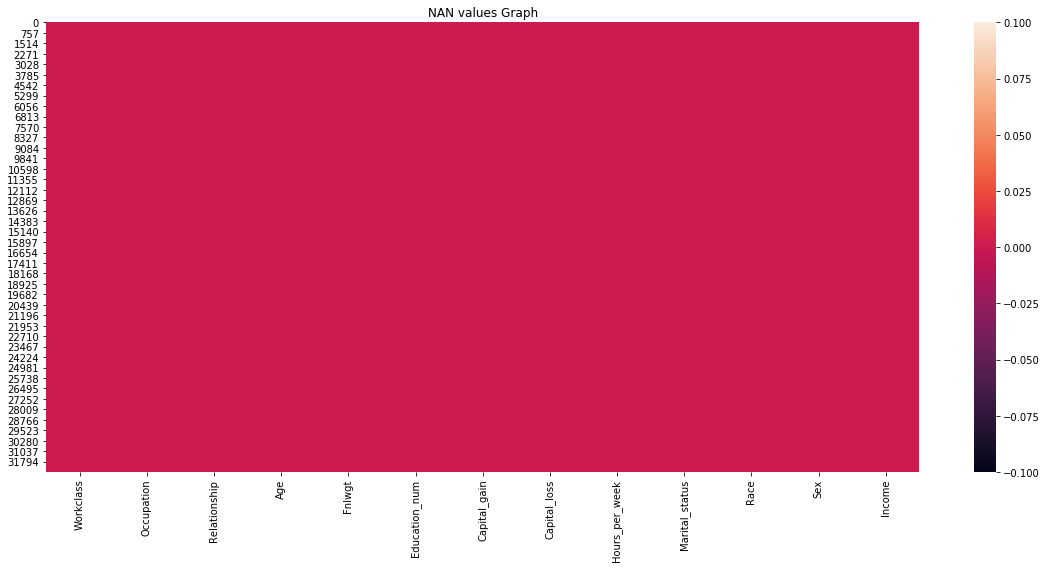

In [148]:
### let's plot it see it visually

plt.figure(figsize=(16,8))
sns.heatmap(X_data.isna())
plt.title("NAN values Graph")
plt.tight_layout()

### All the surface of the heatmap is red and this means there is no missing value in our dataset

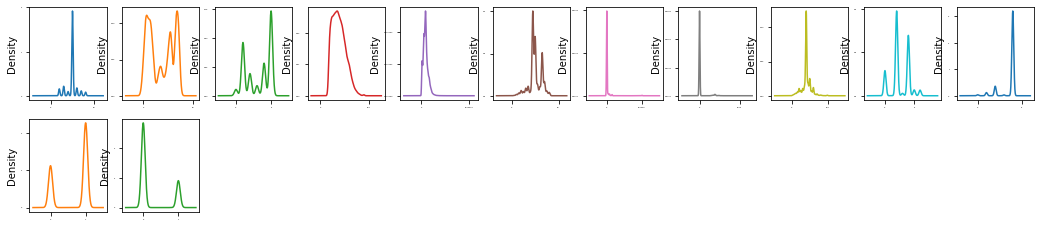

In [149]:
X_data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

### From this density graph we can see that most the columns in the dataset have normal distribution format and some not.

In [150]:
X_data.describe()

Workclass    Occupation  Relationship           Age        Fnlwgt  \
count  32535.000000  32535.000000  32535.000000  32535.000000  3.253500e+04   
mean       4.870048      7.151806      3.260335     38.586107  1.897868e+05   
std        1.157252      4.972449      1.762301     13.638013  1.055569e+05   
min        0.000000      0.000000      0.000000     17.000000  1.228500e+04   
25%        5.000000      2.000000      1.000000     28.000000  1.178330e+05   
50%        5.000000      7.000000      4.000000     37.000000  1.783560e+05   
75%        5.000000     13.000000      5.000000     48.000000  2.369935e+05   
max        8.000000     14.000000      5.000000     90.000000  1.484705e+06   

       Education_num  Capital_gain  Capital_loss  Hours_per_week  \
count   32535.000000  32535.000000  32535.000000    32535.000000   
mean       10.081727   1078.443215     87.373598       40.441279   
std         2.571661   7388.179589    403.113641       12.346115   
min         1.000000      0.000000      0.000000        1.000000   
25%         9.000000      0.000000      0.000000       40.000000   
50%        10.000000      0.000000      0.000000       40.000000   
75%        12.000000      0.000000      0.000000       45.000000   
max        16.000000  99999.000000   4356.000000       99.000000   

       Marital_status          Race           Sex        Income  
count    32535.000000  32535.000000  32535.000000  32535.000000  
mean         2.611342      3.665806      0.669249      0.240941  
std          1.506307      0.848869      0.470491      0.427661  
min          0.000000      0.000000      0.000000      0.000000  
25%          2.000000      4.000000      0.000000      0.000000  
50%          2.000000      4.000000      1.000000      0.000000  
75%          4.000000      4.000000      1.000000      0.000000  
max          6.000000      4.000000      1.000000      1.000000

### from the above describe method we can see some statistical distrubution of columns of our dataset.
### the can see the column "count", "mean", standard deviation ("std"), the min and max and also the quantiles. The statistical distribution in eacg column look good except __"Capital_gain"__ and __"Capital_loss"__ columns.

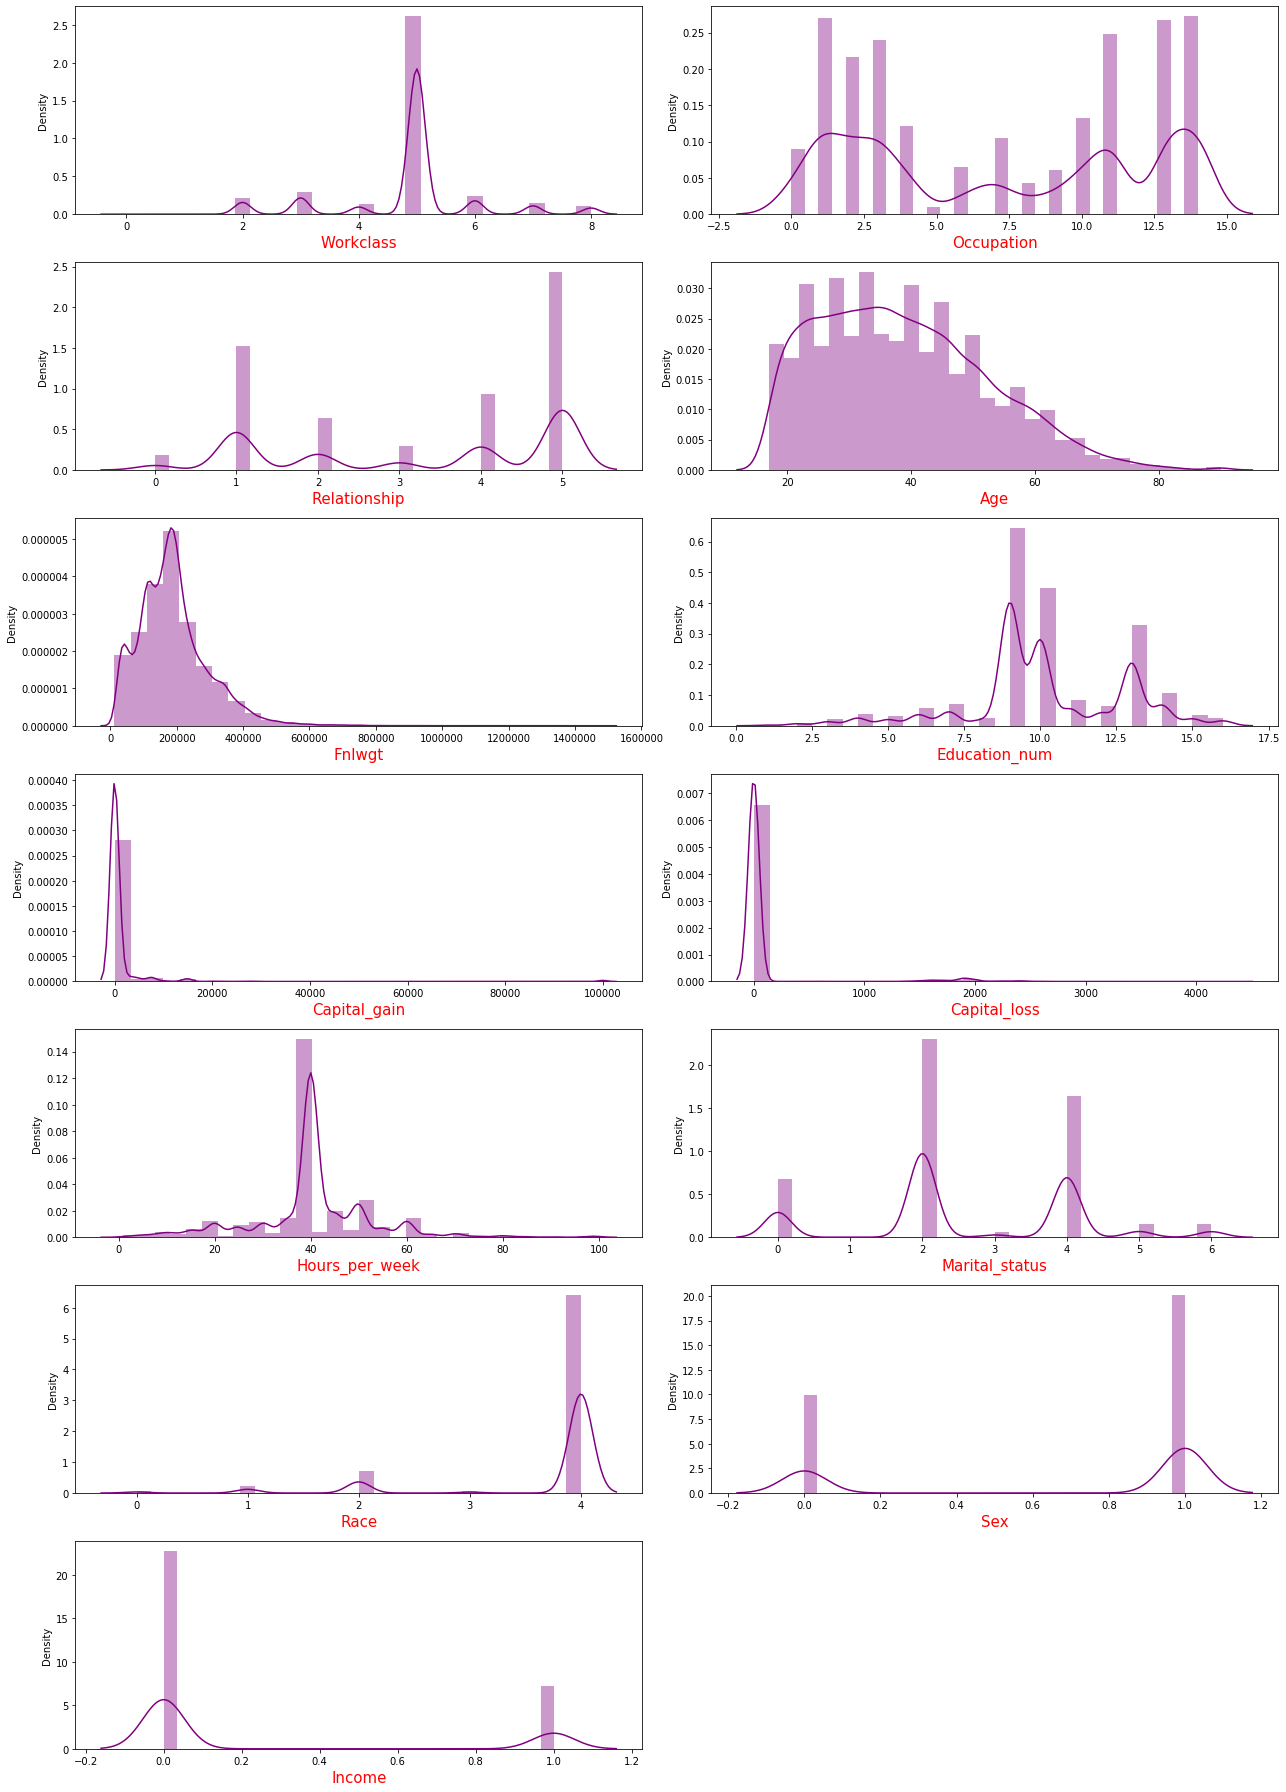

In [156]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in X_data:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(X_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for most the columns since we can see a lot of skewness.

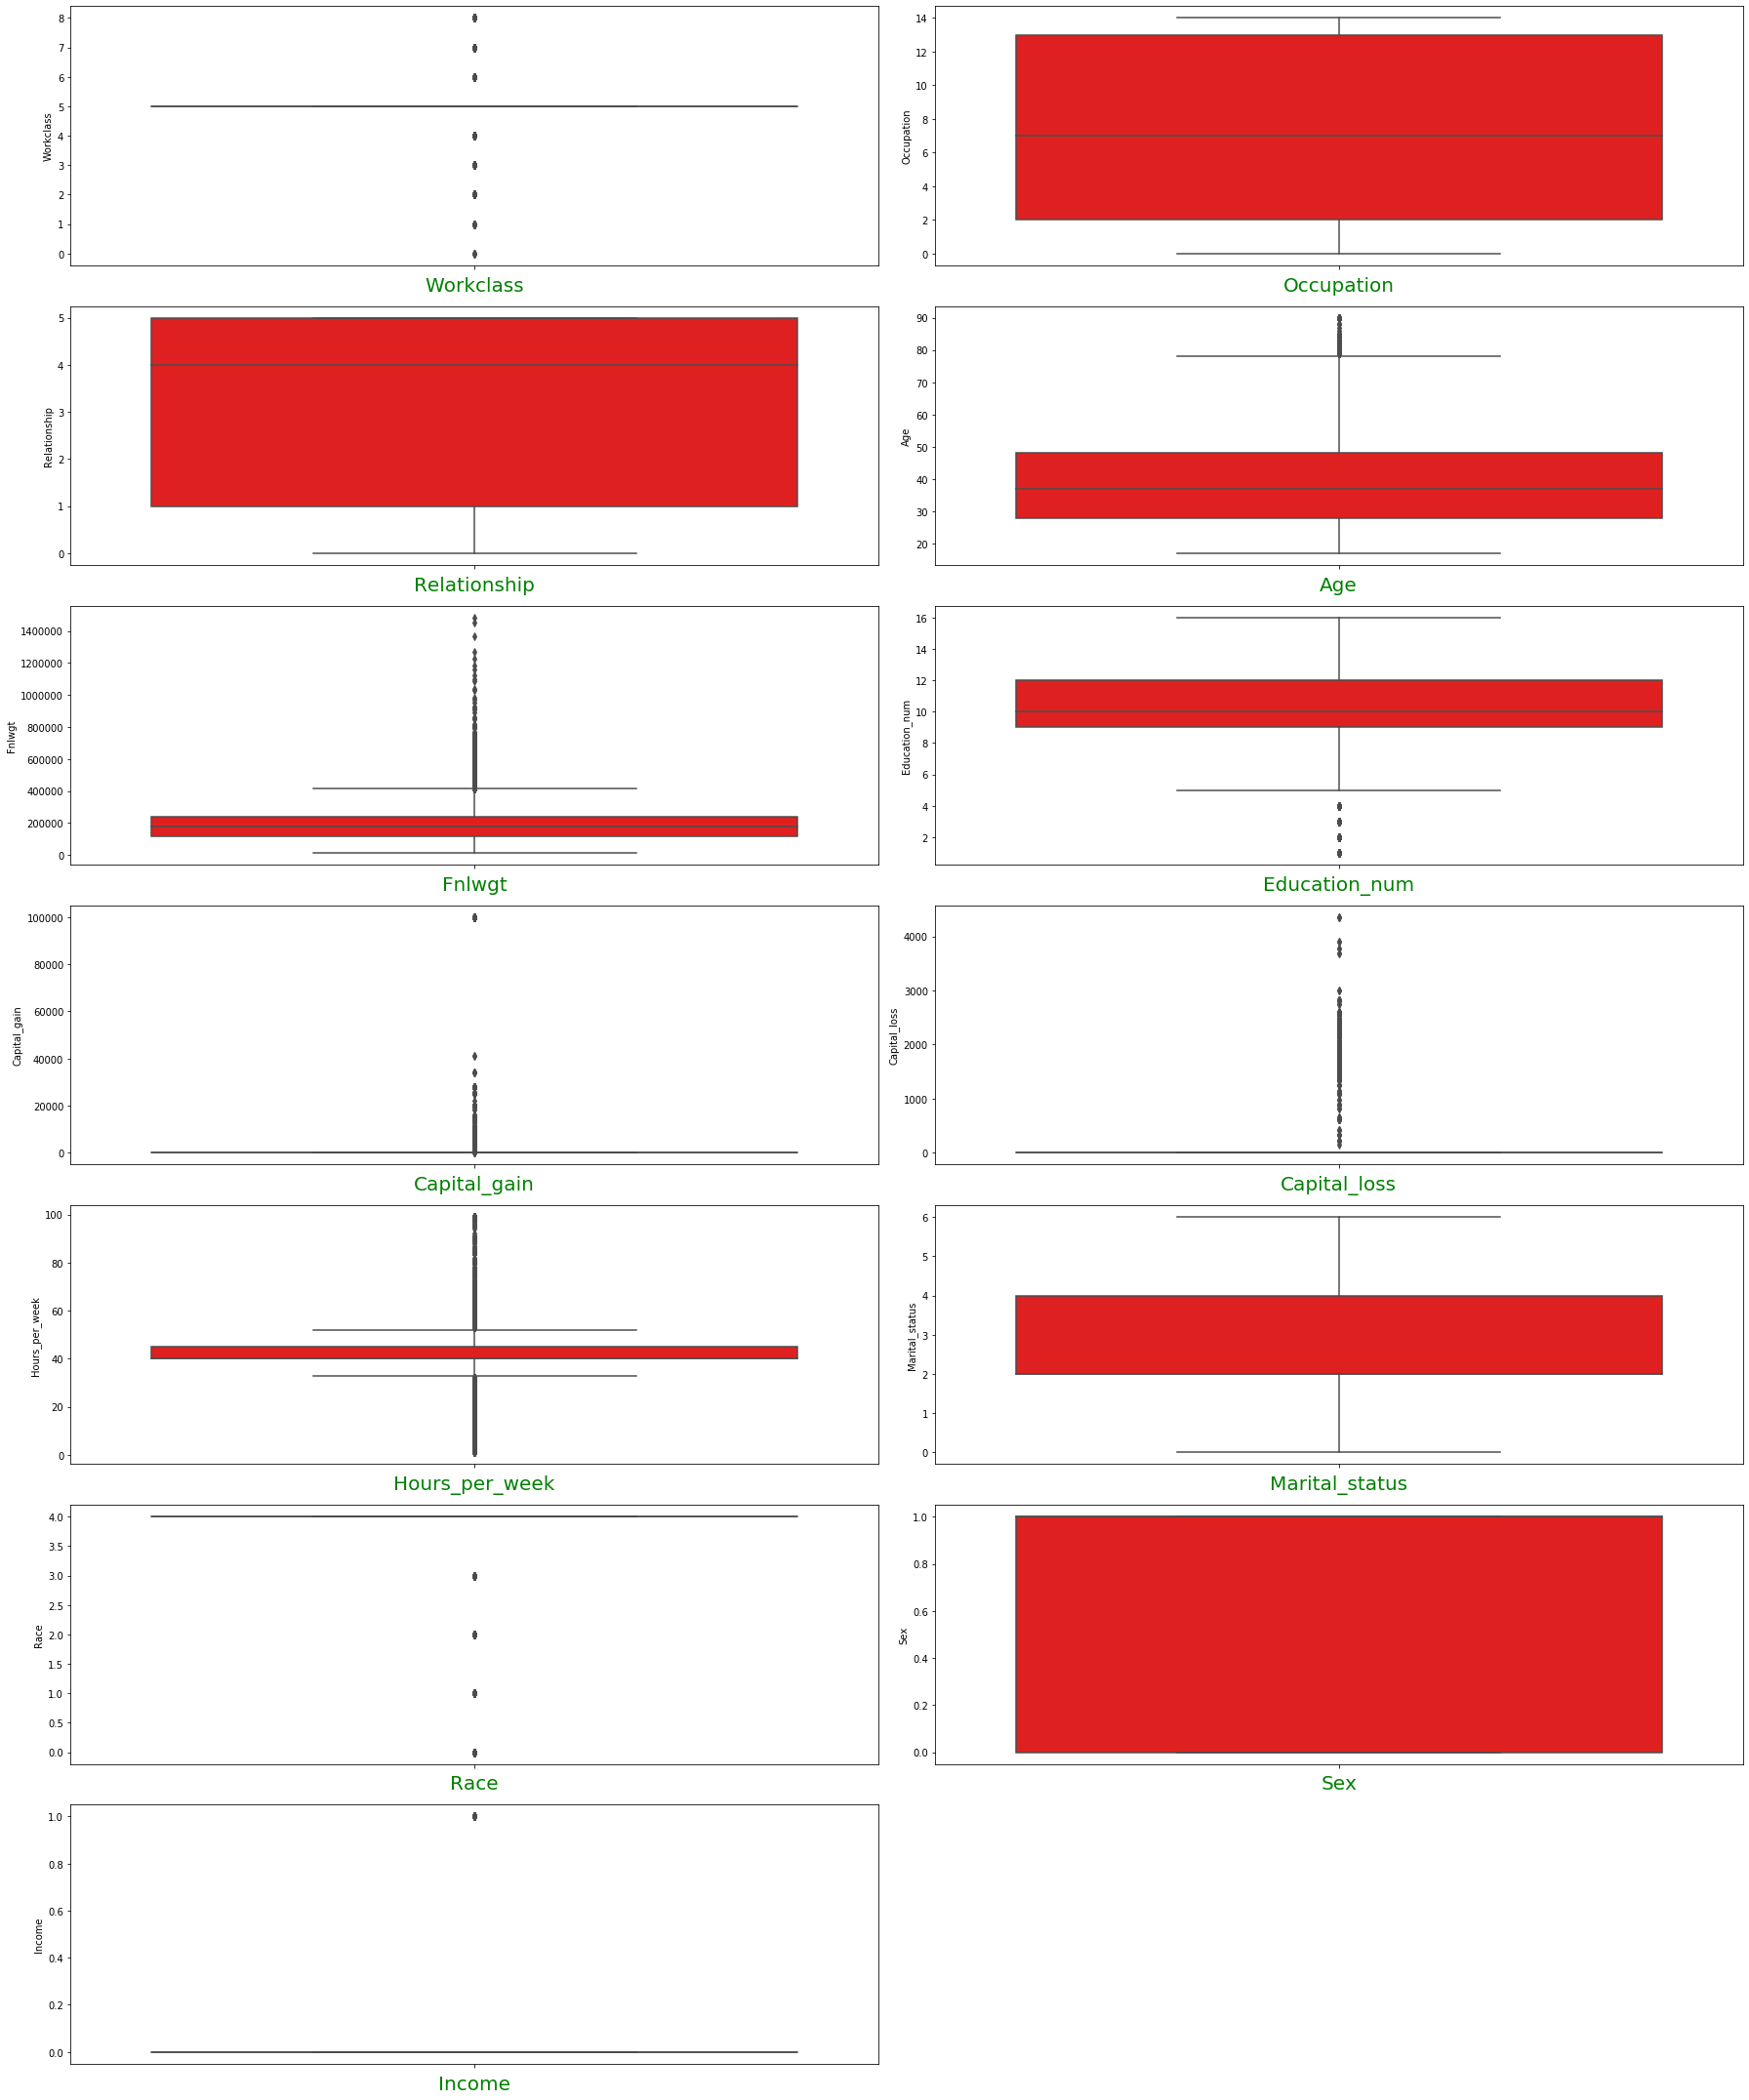

In [157]:
## checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in X_data:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= X_data[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graph we can see outliers in some columns, we will remove the Outliers from the features columns since the label has categorical data not need to remove outliers on it.

### skewness removal

In [158]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [159]:
pt=PowerTransformer(method='yeo-johnson')

In [160]:
features = X_data.drop('Income',axis=1)

### I will remove sknewness from features columns..


In [161]:
X_power=pt.fit_transform(features)

In [162]:
df=pd.DataFrame(X_power,columns=features.columns)

In [164]:
df.head(4)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0  -1.572292    1.104663      0.997727  0.891704 -1.089976       1.164566   
1   0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   
2   0.071097   -1.781144      0.997727  1.064220  0.562531      -1.201011   
3   0.071097    1.243012     -0.181141 -0.732268  1.340329       1.164566   

   Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0     -0.301496     -0.221302       -2.222510       -0.382965  0.412925   
1     -0.301496     -0.221302       -0.035787       -1.782336  0.412925   
2     -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
3     -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   

        Sex  
0  0.703003  
1  0.703003  
2  0.703003  
3 -1.422469

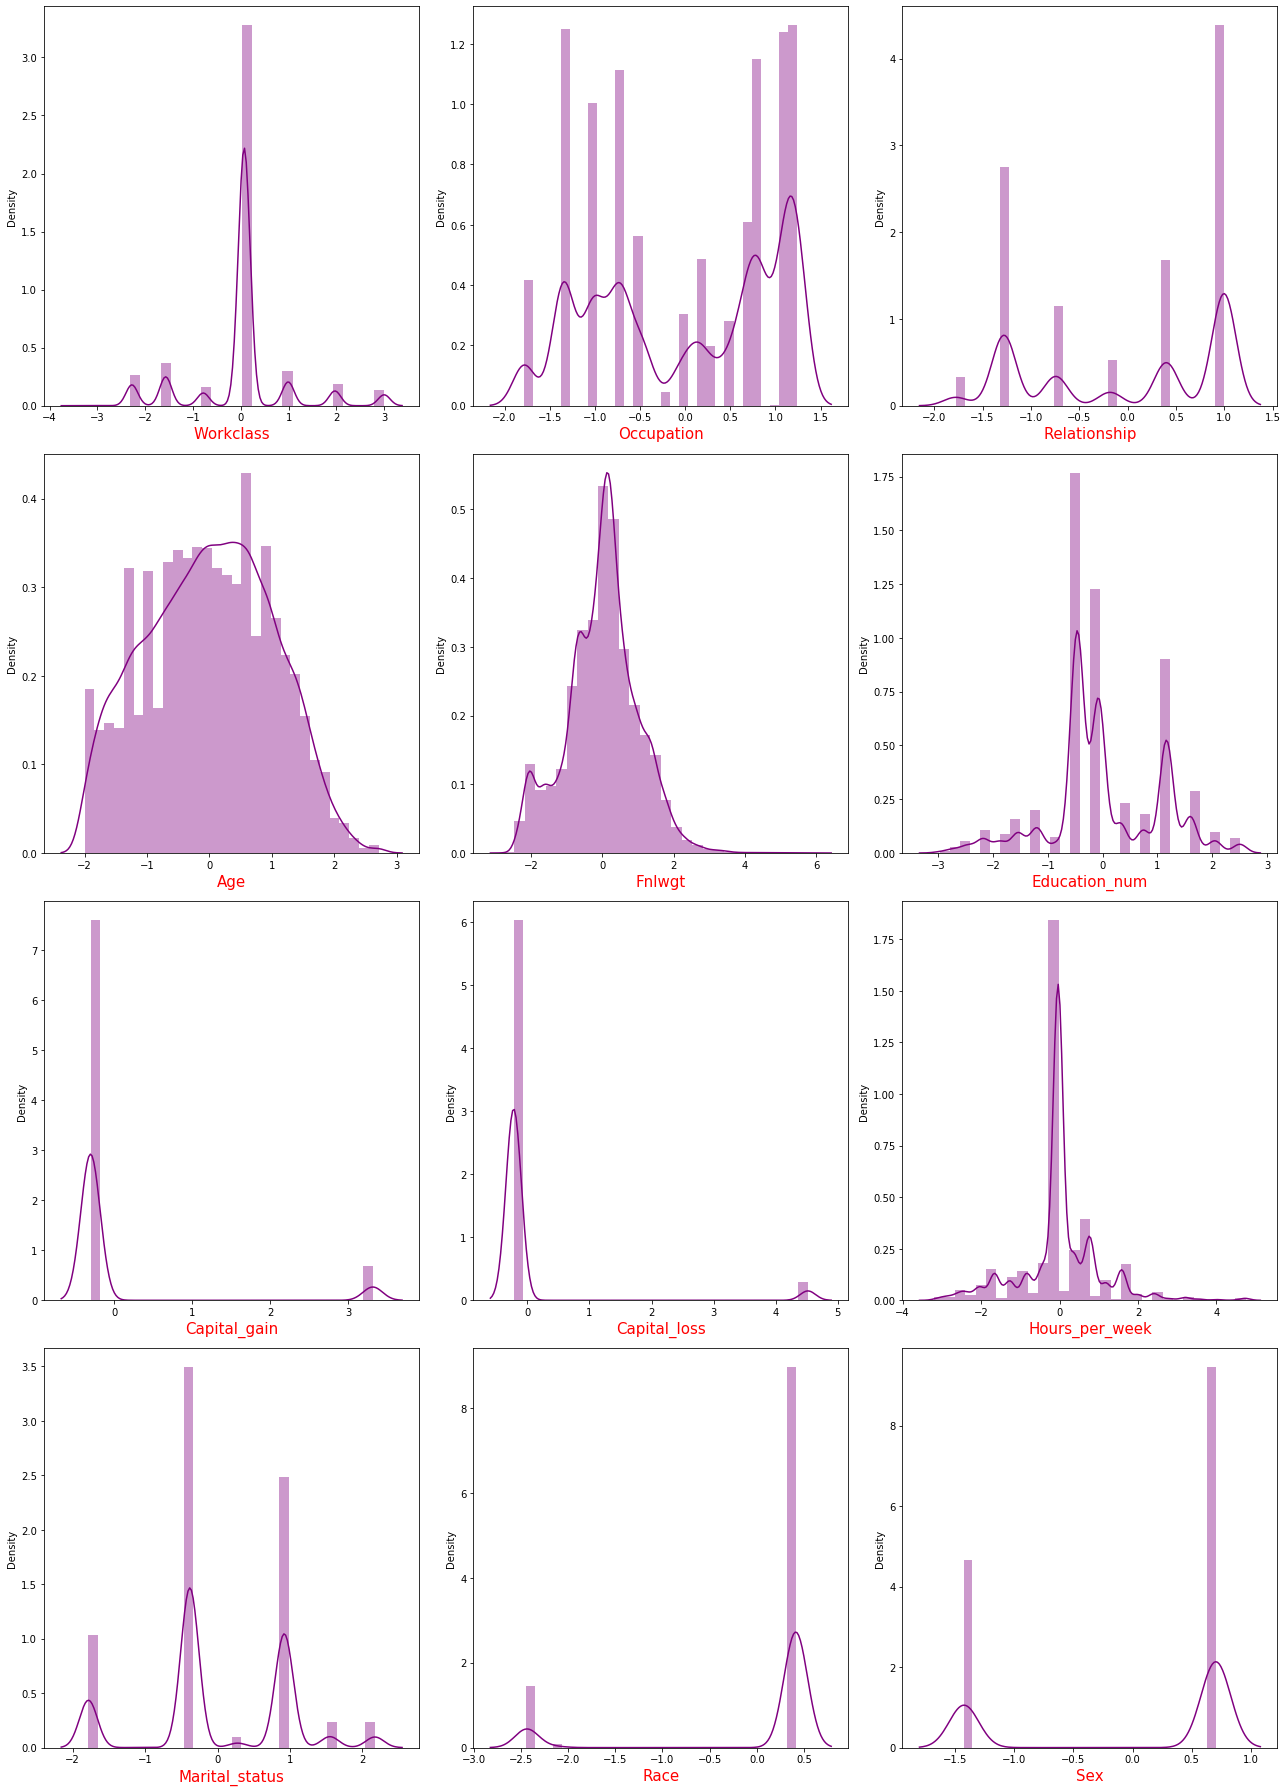

In [165]:

plt.figure(figsize=(18,25))
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()




### from here can see  that our data look better than before, and it has less knewness.

In [ ]:
### Let's check again for the

In [166]:
unskew_data = pd.concat([df,X_data.Income],axis=1)

In [167]:
unskew_data.head(2)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0  -1.572292    1.104663      0.997727  0.891704 -1.089976       1.164566   
1   0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   

   Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0     -0.301496     -0.221302       -2.222510       -0.382965  0.412925   
1     -0.301496     -0.221302       -0.035787       -1.782336  0.412925   

        Sex  Income  
0  0.703003       0  
1  0.703003       0

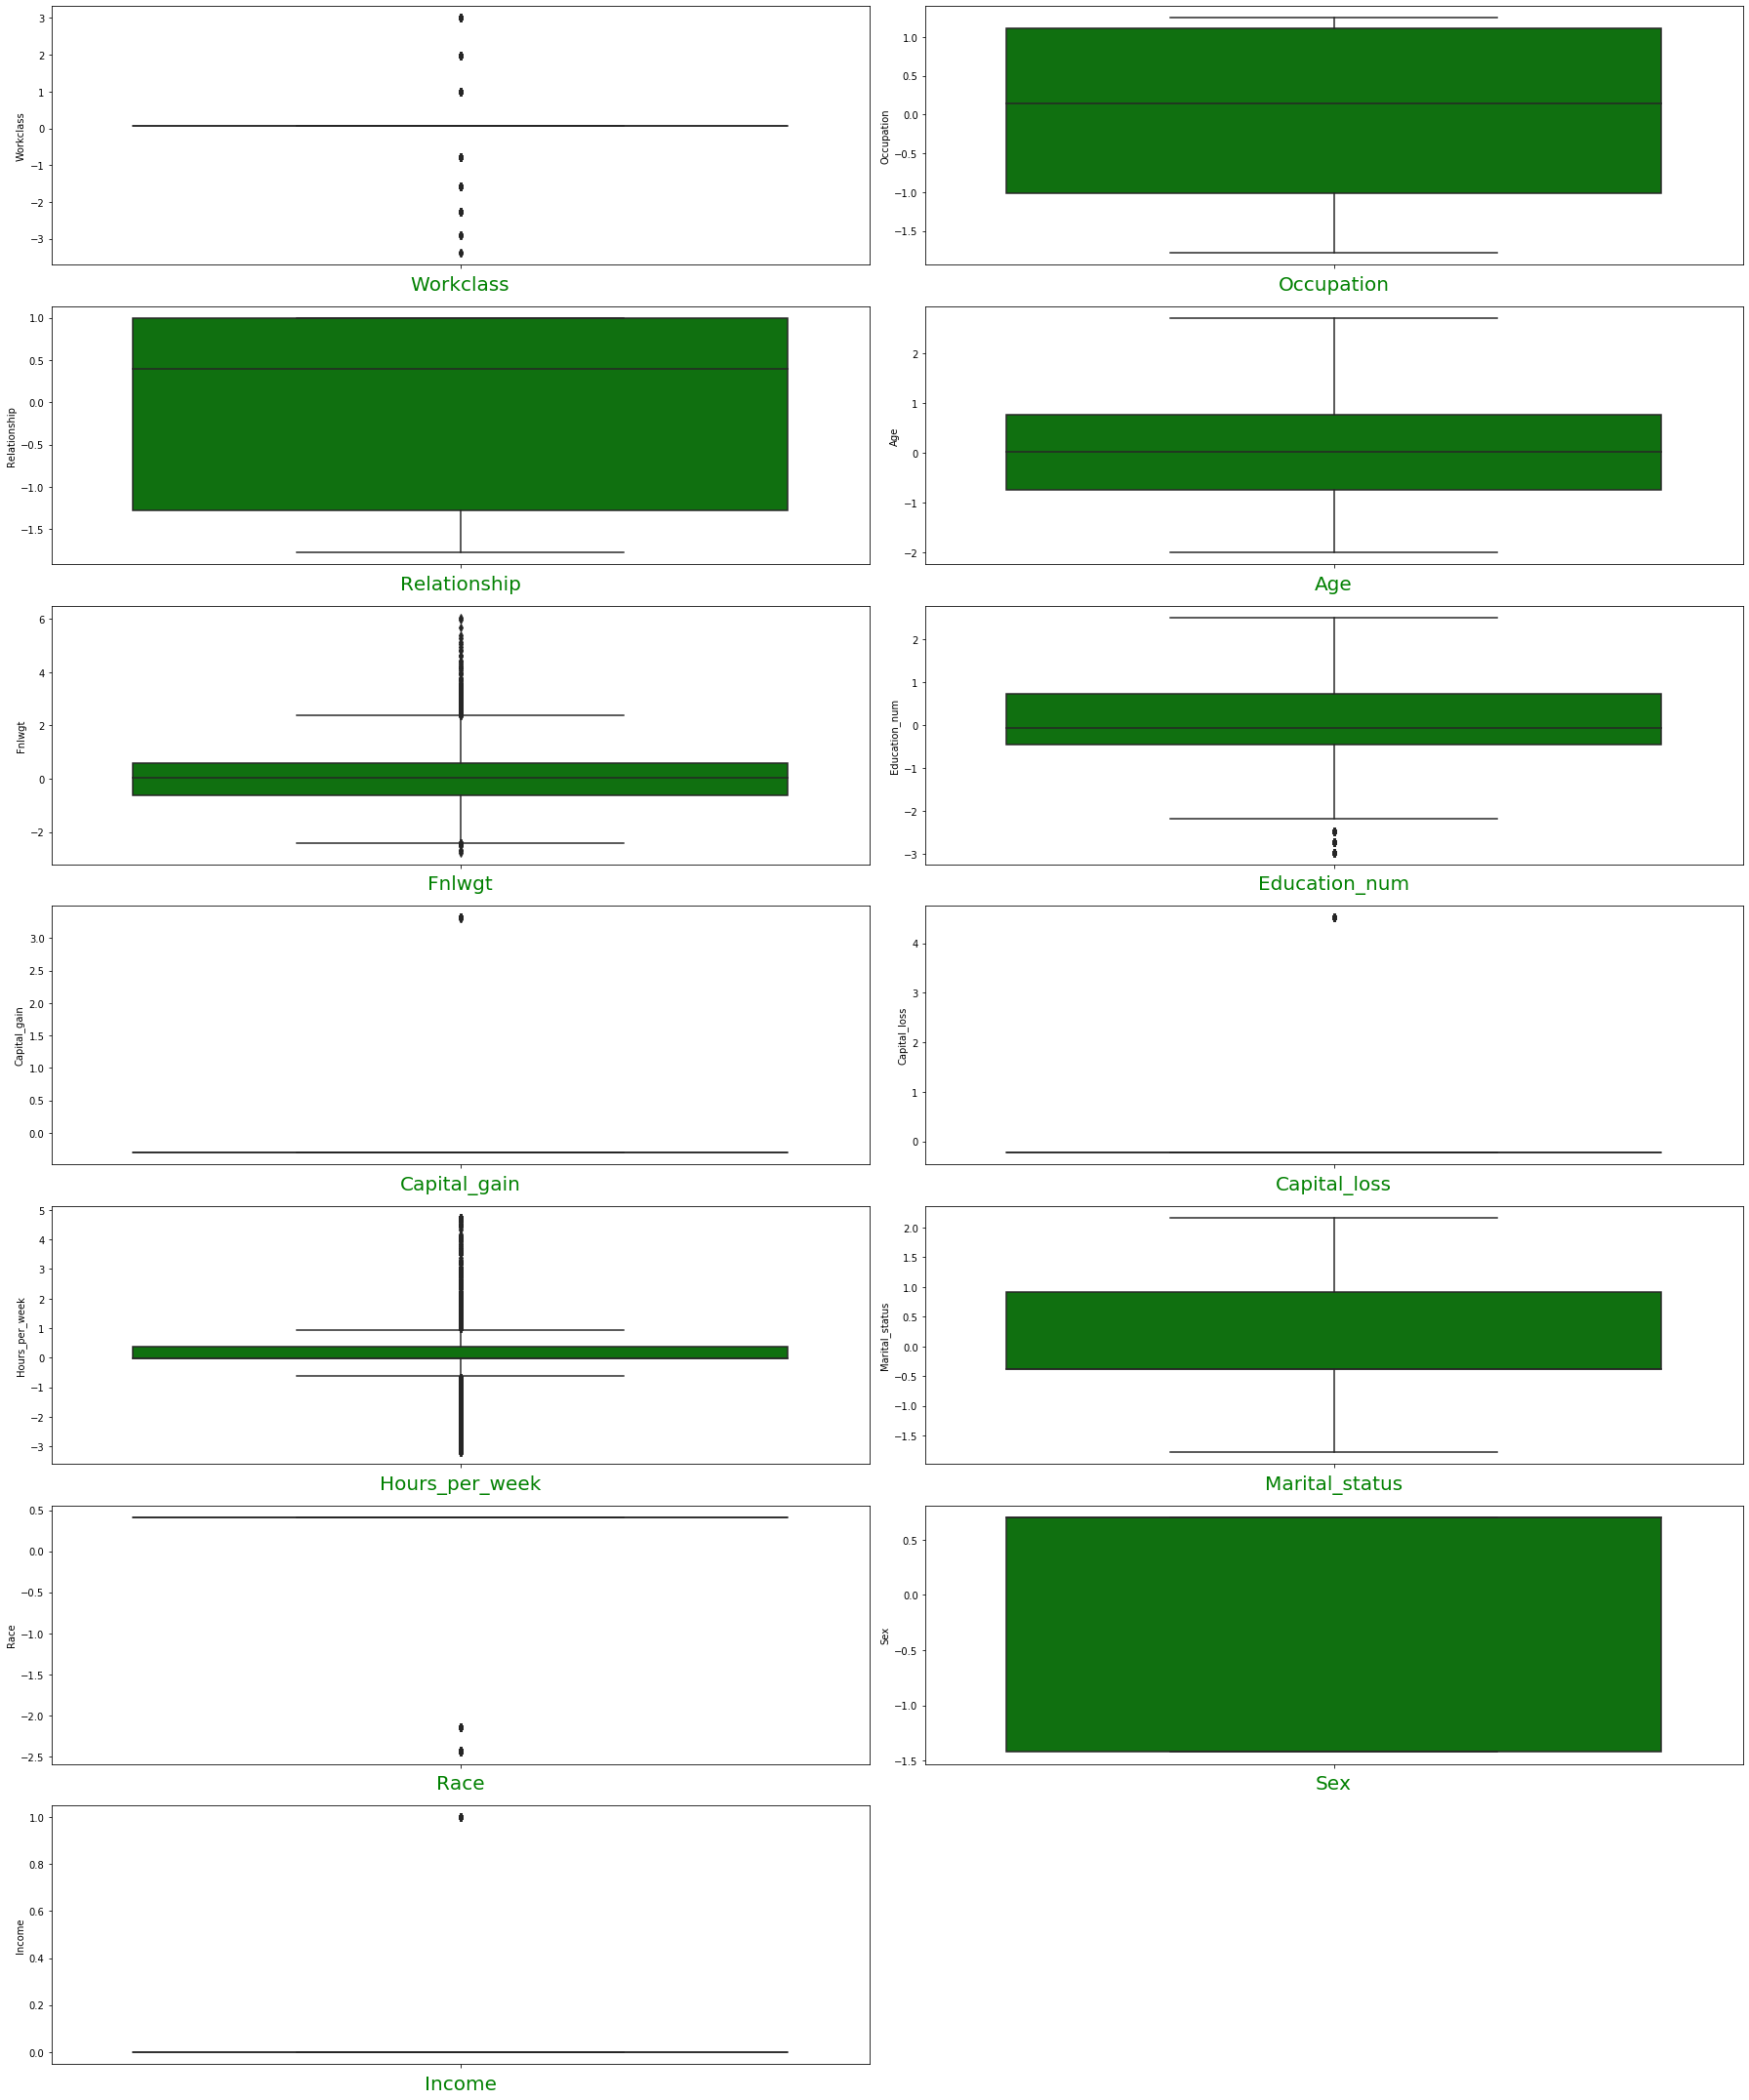

In [168]:
## checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in unskew_data:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= unskew_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### there some outliers in the columns but most of those have categorical data so let's remove outlier from the columns those have continous data.

In [170]:
## first let's remove the outliers from this column "Fnlwgt"

unskew_data.Fnlwgt

0       -1.089976
1        0.398739
2        0.562531
3        1.340329
4        0.957149
           ...   
32530    0.746731
32531   -0.193304
32532   -0.219761
32533    0.271667
32534    0.982130
Name: Fnlwgt, Length: 32535, dtype: float64

### Let's use the Quantiles techniques and see if we can remove them..

#### Outlier Dectection Formula
#### Higher side ===> Q3 + (1.5 * IQR)
#### lower side ===> Q1 - (1.5 * IQR)
#### IQR = Inter Quantile Rate = Q3 - Q1

### We can see that all the outliers are from the high side ,that means after above maximum.

In [171]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = unskew_data.quantile(0.25)

# 3rd quantile
q3 = unskew_data.quantile(0.75)

#IQR 
iqr = q3 - q1

### Removing the Outliers higher side

In [172]:
high_Fnlwgt = (q3.Fnlwgt + (1.5 * iqr.Fnlwgt))
high_Fnlwgt

2.375769695075061

### This means from the column Fnlwgt  all the records values greater than 2.37 (Fnlwgt  >2.37) are Outliers.

In [173]:
## the get indexes of those records

indexes = np.where(unskew_data['Fnlwgt'] > high_Fnlwgt)
indexes

(array([   36,   181,   191,   214,   229,   311,   413,   507,   650,
          826,   913,   962,  1011,  1150,  1290,  1453,  1596,  1846,
         1970,  2064,  2341,  2346,  2368,  2759,  2769,  2823,  2849,
         2899,  2976,  3192,  3302,  3408,  3501,  3568,  3570,  3611,
         3718,  3737,  3743,  3746,  3869,  3905,  3963,  3982,  4277,
         4572,  4696,  4728,  4971,  5275,  5347,  5366,  5420,  5502,
         5527,  5550,  5619,  5724,  6015,  6141,  6164,  6215,  6255,
         6284,  6699,  6729,  6780,  6849,  6876,  7118,  7154,  7329,
         7348,  7452,  7501,  7660,  7716,  7931,  8033,  8234,  8255,
         8273,  8342,  8430,  8482,  8552,  8655,  8726,  8918,  8995,
         9015,  9043,  9244,  9318,  9612,  9696,  9711,  9732,  9744,
         9750,  9752,  9796, 10003, 10396, 10438, 10715, 10910, 11052,
        11324, 11332, 11457, 11690, 11831, 11879, 11972, 12023, 12055,
        12073, 12258, 12327, 12376, 12382, 12481, 12506, 12697, 12755,
      

In [174]:

## Let's drop indexes from the dataset

unskew_data= unskew_data.drop(unskew_data.index[indexes])
## reset the index
unskew_data.reset_index(drop=True)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0      -1.572292    1.104663      0.997727  0.891704 -1.089976       1.164566   
1       0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   
2       0.071097   -1.781144      0.997727  1.064220  0.562531      -1.201011   
3       0.071097    1.243012     -0.181141 -0.732268  1.340329       1.164566   
4       0.071097    1.104663     -0.181141  0.027496  0.957149       1.600463   
...          ...         ...           ...       ...       ...            ...   
32212   0.071097    0.494394     -0.181141 -0.828585  0.746731       0.739533   
32213   0.071097    0.656954      0.997727  0.246900 -0.193304      -0.464653   
32214   0.071097    0.812289     -0.742567  1.334538 -0.219761      -0.464653   
32215   0.071097    0.812289      0.400132 -1.358884  0.271667      -0.464653   
32216  -0.785672    1.104663     -0.181141  1.007634  0.982130      -0.464653   

       Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0         -0.301496     -0.221302       -2.222510       -0.382965  0.412925   
1         -0.301496     -0.221302       -0.035787       -1.782336  0.412925   
2         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
3         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
4         -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
...             ...           ...             ...             ...       ...   
32212     -0.301496     -0.221302       -0.197784       -0.382965  0.412925   
32213     -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
32214     -0.301496     -0.221302       -0.035787        2.171498  0.412925   
32215     -0.301496     -0.221302       -1.655645        0.919955  0.412925   
32216      3.316844     -0.221302       -0.035787       -0.382965  0.412925   

            Sex  Income  
0      0.703003       0  
1      0.703003       0  
2      0.703003       0  
3     -1.422469       0  
4     -1.422469       0  
...         ...     ...  
32212 -1.422469       0  
32213  0.703003       1  
32214 -1.422469       0  
32215  0.703003       0  
32216 -1.422469       1  

[32217 rows x 13 columns]

In [180]:
## "Hours_per_week",column

indexes = np.where(unskew_data["Hours_per_week"] > (q3.Hours_per_week + (1.5 * iqr.Hours_per_week)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0      -1.572292    1.104663      0.997727  0.891704 -1.089976       1.164566   
1       0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   
2       0.071097   -1.781144      0.997727  1.064220  0.562531      -1.201011   
3       0.071097    1.243012     -0.181141 -0.732268  1.340329       1.164566   
4       0.071097    1.104663     -0.181141  0.027496  0.957149       1.600463   
...          ...         ...           ...       ...       ...            ...   
28745   0.071097    0.494394     -0.181141 -0.828585  0.746731       0.739533   
28746   0.071097    0.656954      0.997727  0.246900 -0.193304      -0.464653   
28747   0.071097    0.812289     -0.742567  1.334538 -0.219761      -0.464653   
28748   0.071097    0.812289      0.400132 -1.358884  0.271667      -0.464653   
28749  -0.785672    1.104663     -0.181141  1.007634  0.982130      -0.464653   

       Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0         -0.301496     -0.221302       -2.222510       -0.382965  0.412925   
1         -0.301496     -0.221302       -0.035787       -1.782336  0.412925   
2         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
3         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
4         -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
...             ...           ...             ...             ...       ...   
28745     -0.301496     -0.221302       -0.197784       -0.382965  0.412925   
28746     -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
28747     -0.301496     -0.221302       -0.035787        2.171498  0.412925   
28748     -0.301496     -0.221302       -1.655645        0.919955  0.412925   
28749      3.316844     -0.221302       -0.035787       -0.382965  0.412925   

            Sex  Income  
0      0.703003       0  
1      0.703003       0  
2      0.703003       0  
3     -1.422469       0  
4     -1.422469       0  
...         ...     ...  
28745 -1.422469       0  
28746  0.703003       1  
28747 -1.422469       0  
28748  0.703003       0  
28749 -1.422469       1  

[28750 rows x 13 columns]

### __Removing outliers from lower side. this below to the minimum (min)__

In [182]:
indexes = np.where(unskew_data["Fnlwgt"] < (q3.Fnlwgt -(1.5 * iqr.Fnlwgt)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0      -1.572292    1.104663      0.997727  0.891704 -1.089976       1.164566   
1       0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   
2       0.071097   -1.781144      0.997727  1.064220  0.562531      -1.201011   
3       0.071097    1.243012     -0.181141 -0.732268  1.340329       1.164566   
4       0.071097    1.104663     -0.181141  0.027496  0.957149       1.600463   
...          ...         ...           ...       ...       ...            ...   
25487   0.071097    0.494394     -0.181141 -0.828585  0.746731       0.739533   
25488   0.071097    0.656954      0.997727  0.246900 -0.193304      -0.464653   
25489   0.071097    0.812289     -0.742567  1.334538 -0.219761      -0.464653   
25490   0.071097    0.812289      0.400132 -1.358884  0.271667      -0.464653   
25491  -0.785672    1.104663     -0.181141  1.007634  0.982130      -0.464653   

       Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0         -0.301496     -0.221302       -2.222510       -0.382965  0.412925   
1         -0.301496     -0.221302       -0.035787       -1.782336  0.412925   
2         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
3         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
4         -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
...             ...           ...             ...             ...       ...   
25487     -0.301496     -0.221302       -0.197784       -0.382965  0.412925   
25488     -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
25489     -0.301496     -0.221302       -0.035787        2.171498  0.412925   
25490     -0.301496     -0.221302       -1.655645        0.919955  0.412925   
25491      3.316844     -0.221302       -0.035787       -0.382965  0.412925   

            Sex  Income  
0      0.703003       0  
1      0.703003       0  
2      0.703003       0  
3     -1.422469       0  
4     -1.422469       0  
...         ...     ...  
25487 -1.422469       0  
25488  0.703003       1  
25489 -1.422469       0  
25490  0.703003       0  
25491 -1.422469       1  

[25492 rows x 13 columns]

In [183]:
indexes = np.where(unskew_data["Hours_per_week"] < (q3.Hours_per_week - (1.5 * iqr.Hours_per_week)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

Workclass  Occupation  Relationship       Age    Fnlwgt  Education_num  \
0       0.071097   -1.781144     -1.278382  0.102207  0.398739      -0.464653   
1       0.071097   -1.781144      0.997727  1.064220  0.562531      -1.201011   
2       0.071097    1.243012     -0.181141 -0.732268  1.340329       1.164566   
3       0.071097    1.104663     -0.181141  0.027496  0.957149       1.600463   
4      -1.572292    1.104663      0.997727  1.007634  0.345454      -0.464653   
...          ...         ...           ...       ...       ...            ...   
19164   0.071097    0.323495     -1.278382 -1.358884  1.143985      -0.075728   
19165   0.071097    0.494394     -0.181141 -0.828585  0.746731       0.739533   
19166   0.071097    0.656954      0.997727  0.246900 -0.193304      -0.464653   
19167   0.071097    0.812289     -0.742567  1.334538 -0.219761      -0.464653   
19168  -0.785672    1.104663     -0.181141  1.007634  0.982130      -0.464653   

       Capital_gain  Capital_loss  Hours_per_week  Marital_status      Race  \
0         -0.301496     -0.221302       -0.035787       -1.782336  0.412925   
1         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
2         -0.301496     -0.221302       -0.035787       -0.382965 -2.431738   
3         -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
4         -0.301496     -0.221302        0.369217       -0.382965  0.412925   
...             ...           ...             ...             ...       ...   
19164     -0.301496     -0.221302       -0.035787        0.919955  0.412925   
19165     -0.301496     -0.221302       -0.197784       -0.382965  0.412925   
19166     -0.301496     -0.221302       -0.035787       -0.382965  0.412925   
19167     -0.301496     -0.221302       -0.035787        2.171498  0.412925   
19168      3.316844     -0.221302       -0.035787       -0.382965  0.412925   

            Sex  Income  
0      0.703003       0  
1      0.703003       0  
2     -1.422469       0  
3     -1.422469       0  
4      0.703003       1  
...         ...     ...  
19164  0.703003       0  
19165 -1.422469       0  
19166  0.703003       1  
19167 -1.422469       0  
19168 -1.422469       1  

[19169 rows x 13 columns]

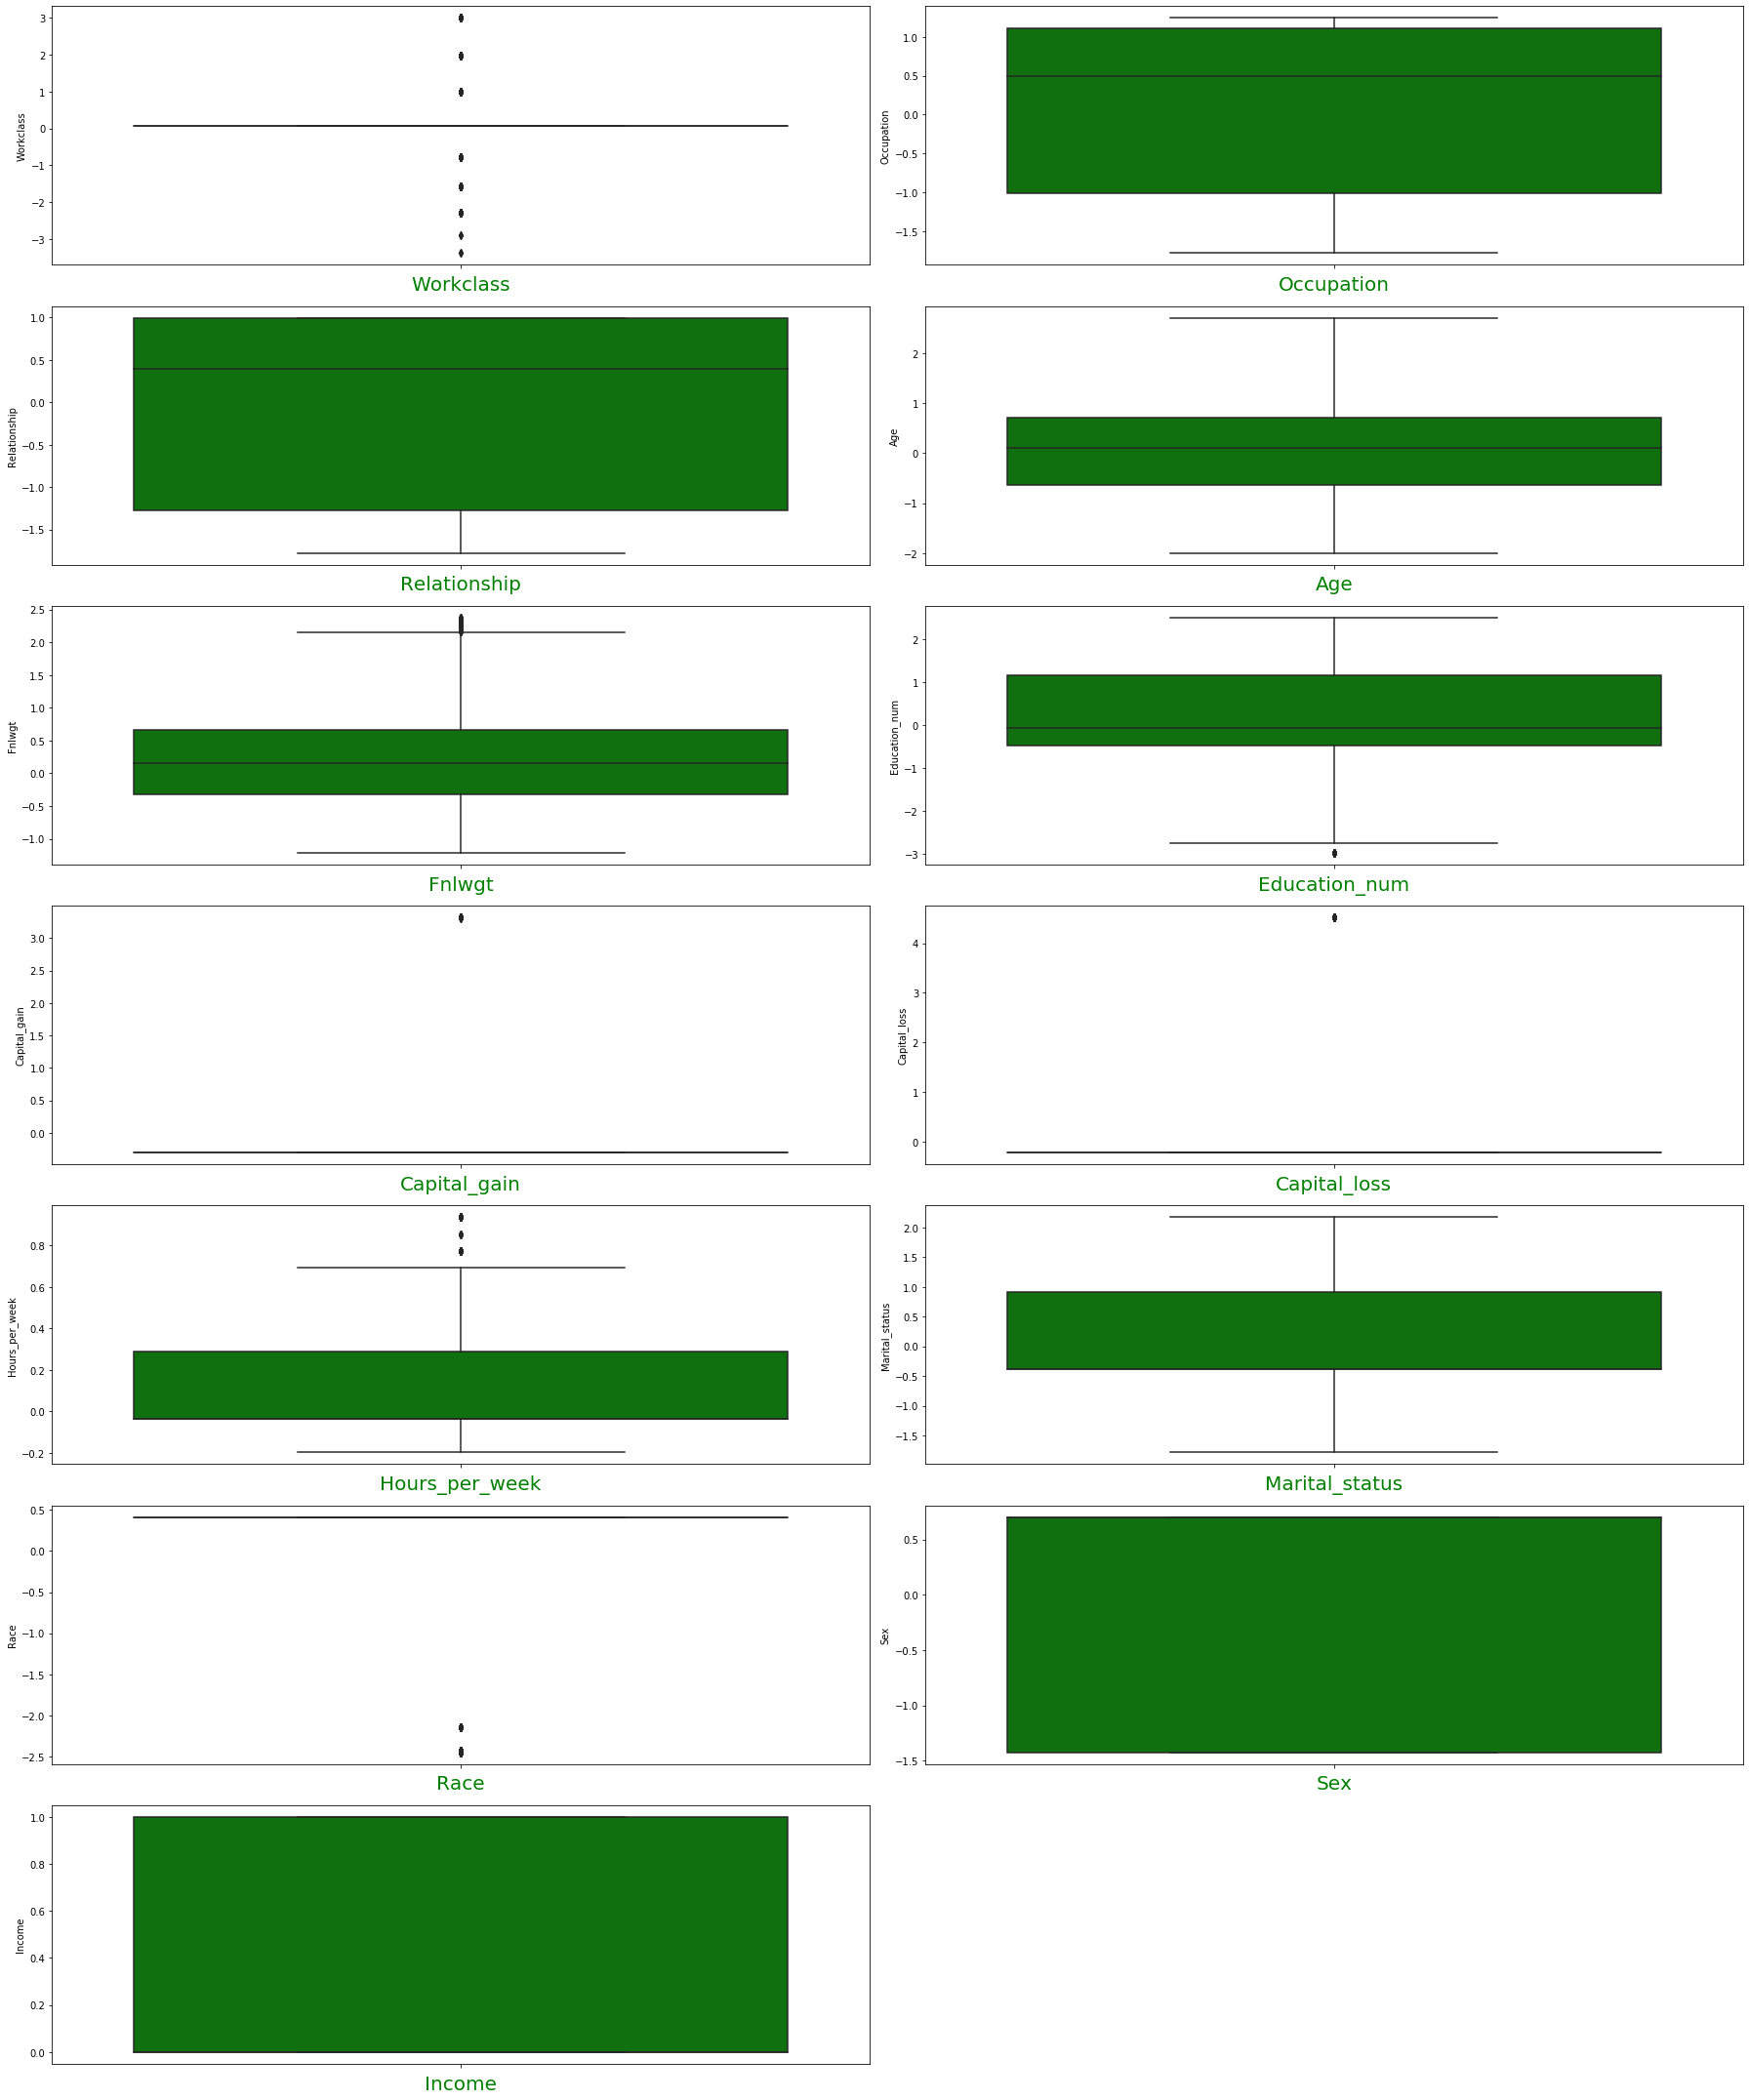

In [184]:
## checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in unskew_data:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= unskew_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the boxplot here we can say that our data look better than before after removing the previous outliers from continous data columns.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

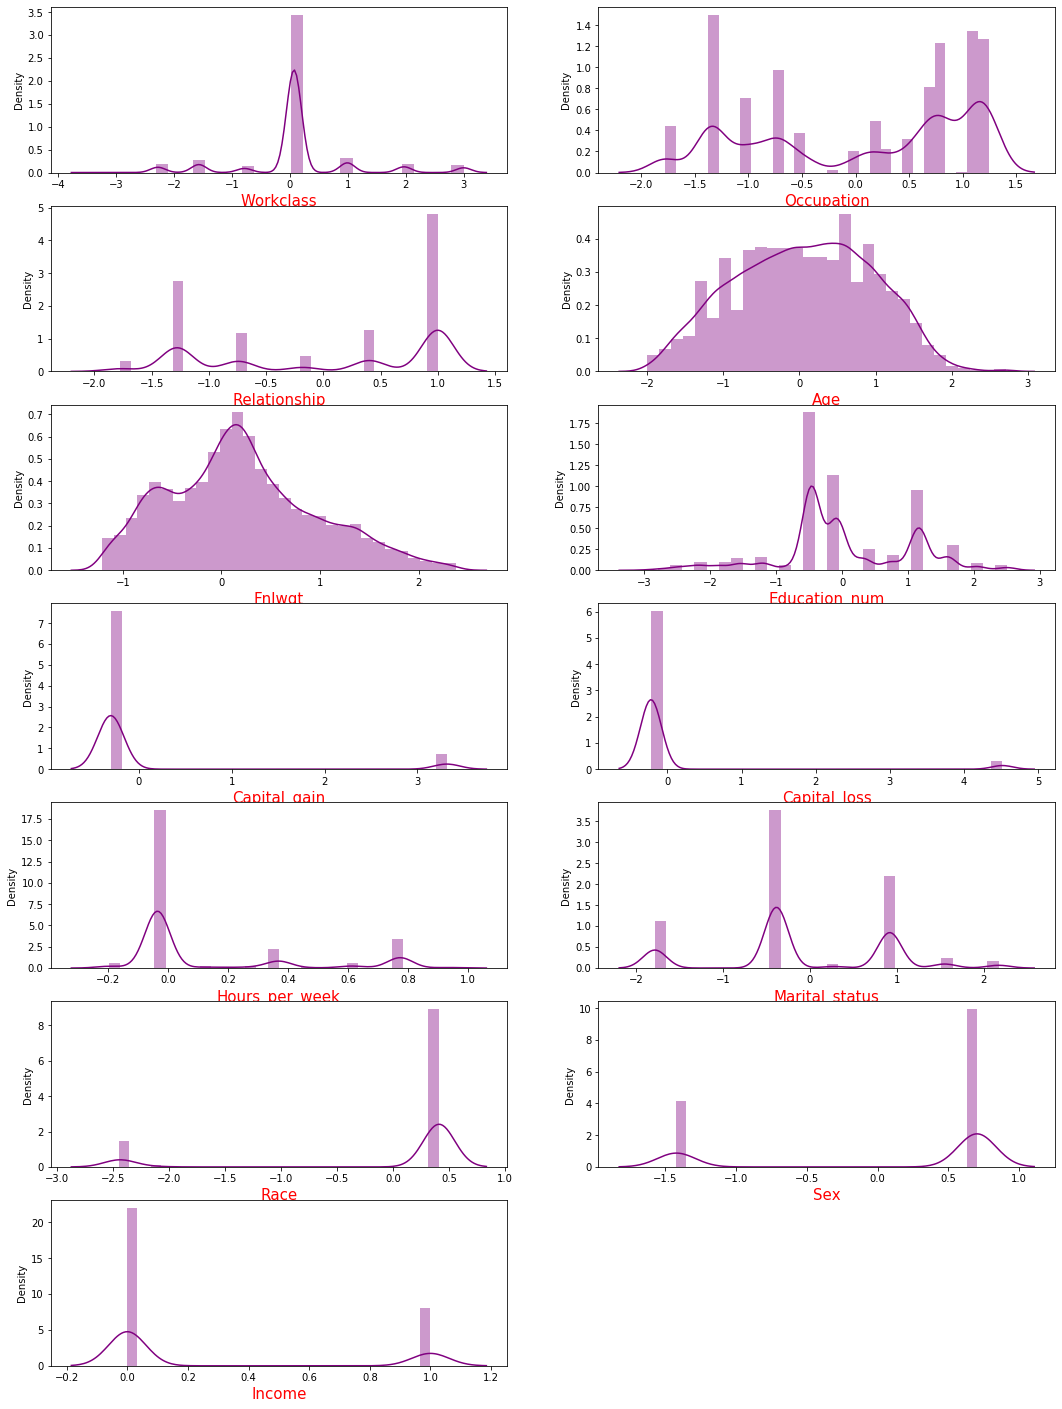

In [185]:
plt.figure(figsize=(18,25))
plotnumber = 1
for column in unskew_data:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(unskew_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout

### Again from above distplot we can see that the distribution of data in each attribute look better than before.

### Now let's check if the classes in the label are balanced or not

In [186]:
from collections import Counter

In [187]:
### checking percentage of each class

counter = Counter(unskew_data['Income'])
for k, v in counter.items():
    dist = (v/len(unskew_data['Income']) *100)
    print(f" Class = {k},n={v} ({dist}%)")

 Class = 0,n=14059 (73.34237571078303%)
 Class = 1,n=5110 (26.65762428921696%)


#### We can see that our data is not balance

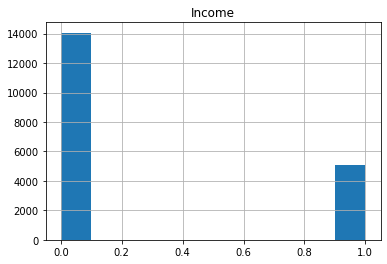

In [188]:
## let's plot it and see how it look like 

unskew_data['Income'].hist(grid=True)
plt.title('Income')
plt.show()


### From this histogram we can see that the classes are imbalance and class 0 majority and class 1 minority. So let's handling class imbalance using oversampling the minority class.

In [193]:
## importang the libraries

from imblearn.over_sampling import SMOTE

SM = SMOTE()

In [190]:
## let's seperate our dataset int features and label first.

X = unskew_data.drop('Income',axis=1)
y = unskew_data.Income

In [191]:
### let's fit it.
x_over , y_over = SM.fit_resample(X,y)

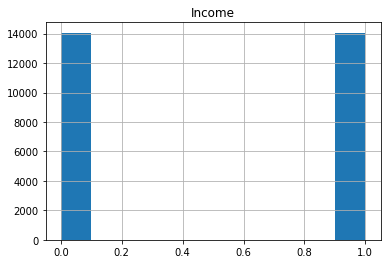

In [194]:
## verification

## let's plot it and see how it look like 

y_over.hist(grid=True)
plt.title('Income')
plt.show()

### Now we can see that our classes are balanced so we can build the model now. so we can build our first model with dataset.

### Before fit our data to the model ,let's see by visualize the relationship bw the features and the label usig stripplot() method.

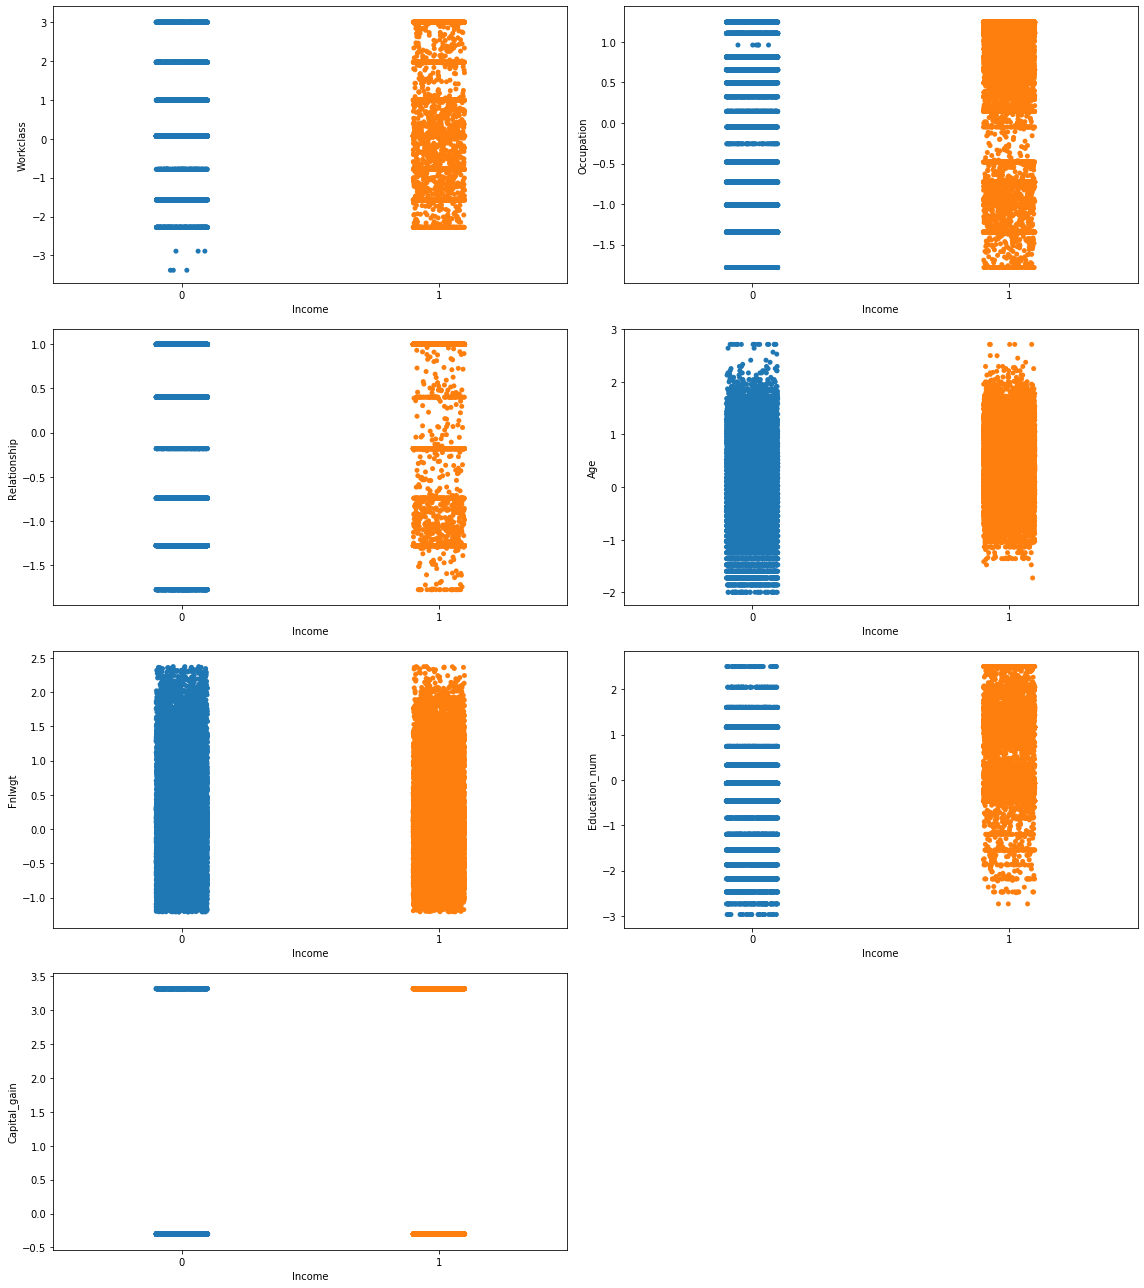

In [197]:
## Let's relationship between the label and fetures using subplot

plt.figure(figsize=(16,18), facecolor='white')
plot_no = 1

for column in x_over:
    if plot_no <= 7:
        ax = plt.subplot(4,2,plot_no)
        sns.stripplot(y_over, x_over[column])
    plot_no+=1
plt.tight_layout()

### From the above graph, we can say that all the features are important and they have a gread relationship with our label data (target Income)

In [198]:
print('**'*40)
print('**'*40)

********************************************************************************
********************************************************************************


## __Now let's build the models and predict the Income.__

In [199]:
### Importing the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [200]:
## Let's found the best random state.
max_accu = 0
max_RS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)

Best accuracy is : 0.9333333333333333 on Random_state 133


### This code above help us to find the best random_state = 133 Best accuracy is : 93%

In [201]:
## let's build gain the model using the best random_state

x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=133)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_predlr = lr_model.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, y_predlr))
print('--'*20)
print(confusion_matrix(y_test,y_predlr))
print(classification_report(y_test,y_predlr))

The Accuracy is : 0.9333333333333333
----------------------------------------
[[16  0]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### __LogisticRegression  model (lr_model) gives accuracy 93 %. good .__

## Let's build a more models select the best one.

In [202]:
## import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Suport Vector Machine model
from sklearn.ensemble import GradientBoostingClassifier

In [203]:
### DecisionTreeClassifier model.

dt = DecisionTreeClassifier(random_state=133)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_dt))
print('--'*20)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))

The Accuracy is : 0.8666666666666667
----------------------------------------
[[14  2]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



#### __DecisionTreeClassifier model accuracy 86%__

In [204]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [205]:
## RandomForestClassifier

rf = RandomForestClassifier(133)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_rf))
print('--'*20)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

The Accuracy is : 0.9333333333333333
----------------------------------------
[[16  0]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### __RandomForestClassifier Accuracy is : 93%__

In [206]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [208]:
# Suport Vector Machine model( SVC )

svc = SVC(random_state=133)

svc.fit(x_train, y_train)

pred_svc = svc.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_svc))
print('--'*20)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

The Accuracy is : 0.9
----------------------------------------
[[15  1]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### __Suport Vector Machine model gives Accuracy = 90%__

In [209]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [210]:
### GrandientBoostingClassifier model

gbdt_clf = GradientBoostingClassifier(random_state=133)
gbdt_clf.fit(x_train,y_train)
pred_gb = gbdt_clf.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_gb))
print('--'*20)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

The Accuracy is : 0.9
----------------------------------------
[[16  0]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.90        30
weighted avg       0.92      0.90      0.90        30



#### __GrandientBoostingClassifier model gives accuracy 90%__

In [211]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


## Let's go for cross validation score and see if there is overfitting or not and wich model performe better among them.

In [212]:
### importing the library
from sklearn.model_selection import cross_val_score

In [219]:
## first  model lr_model

scr = cross_val_score(lr_model,x_over,y_over,cv=7)
print('Cross Validation Score of LogisticRegression model:',scr.mean())
print('--'*35)

Cross Validation Score of LogisticRegression model: 0.7797496932147651
----------------------------------------------------------------------


In [218]:
## second  model dt

scr = cross_val_score(dt,x_over,y_over,cv=7)
print('Cross Validation Score of DecisionTreeClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of DecisionTreeClassifier model: 0.836440618620153
----------------------------------------------------------------------


In [220]:
## Third model rf

scr = cross_val_score(rf,x_over,y_over,cv=7)
print('Cross Validation Score of  RandomForestClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of  RandomForestClassifier model: 0.882994374789331
----------------------------------------------------------------------


In [221]:
## Fourth model svc

scr = cross_val_score(svc,x_over,y_over,cv=7)

print('Cross Validation Score of Suport Vector Machine model:',scr.mean())
print('--'*35)

Cross Validation Score of Suport Vector Machine model: 0.8105843722092321
----------------------------------------------------------------------


In [222]:
## Fith model GradientBoostingClassifier

scr = cross_val_score(gbdt_clf,x_over,y_over,cv=7)

print('Cross Validation Score of GradientBoostingClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of GradientBoostingClassifier model: 0.8504524524328803
----------------------------------------------------------------------


### Let's check the diffrence values between __Cross Validation__ and the __Accuracy__ of each model.

In [223]:
print('\nLogisticRegression model diff is:',93 -77)
print('--'*35)
print('\nDecisionTreeClassifier model diff is:',86 -83)
print('--'*35)
print('\nRandomForestClassifier  model diff is:',93 -88)
print('--'*35)
print('\nSuport Vector Machine model diff is:',90 -81)
print('--'*35)
print('\nGradientBoostingClassifier model diff is:',90 -85)


LogisticRegression model diff is: 16
----------------------------------------------------------------------

DecisionTreeClassifier model diff is: 3
----------------------------------------------------------------------

RandomForestClassifier  model diff is: 5
----------------------------------------------------------------------

Suport Vector Machine model diff is: 9
----------------------------------------------------------------------

GradientBoostingClassifier model diff is: 5


## The minimum defference in accuracy and cross validation score is for __DecisionTreeClassifier__ model, So it is our best model..

### Let's try if we can improve the performance of our model using Hyperparameter Tuning


## __Hyperparameter Tuning__

In [225]:
## importing the libraries
from sklearn.model_selection import GridSearchCV

In [226]:
# We are tuning three hyperparamters right now,
# we are passing the different values for both paramters

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2)
}

In [227]:
grid_search = GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=7,
                         n_jobs=-1)

In [228]:
## again train the model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=133),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [229]:
# best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [230]:
## so let's build again the decisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini',
                            max_depth=8,
                            min_samples_leaf=9,
                            min_samples_split=2)

In [231]:
## let's fit gain the model with the data

dt_model.fit(x_train,y_train)
pred_dt = dt_model.predict(x_test)
dt_model_report = pd.DataFrame(classification_report(
    y_test,pred_dt,output_dict=True))


print("\n=============Test Result==============")

print(f"Accuracy Score:{accuracy_score(y_test,pred_dt)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_model_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred_dt)}\n")


=============Test Result==============
Accuracy Score:86.67%
_____________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.916667  0.866667   0.875000      0.872222
recall      0.937500   0.785714  0.866667   0.861607      0.866667
f1-score    0.882353   0.846154  0.866667   0.864253      0.865460
support    16.000000  14.000000  0.866667  30.000000     30.000000
_____________________________________________
Confusion Matrix:
[[15  1]
 [ 3 11]]



### After Hyper paramter Turning we are not able to improve our model accury we got same score 86% Accuracy ,so let's save model as it is.

## __Conclusion: DecisionTreeClassifier is our best model with 86% accuracy__

### Let's plot the  tree graph.

In [232]:
### importing the libraries

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

In [233]:
feature_name = list(x_over.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.203614 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.203614 to fit



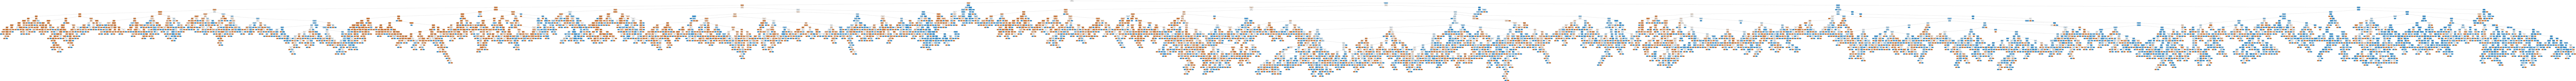

In [234]:
# Create a dot_file which store the tree structure

dot_data = export_graphviz(dt,
                           feature_names=feature_name,
                           rounded=True,
                          filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Image_Tree.png')

# shwo graph
Image(graph.create_png())

### Saving the model.

In [235]:
import joblib


In [236]:
joblib.dump(dt_model,'Income_prediction_model.pkl')

['Income_prediction_model.pkl']

## __END OF THE  PROJECT.__